# Projet n°7 : Implémentez un modèle de scoring

## Enoncé général du projet 

Vous êtes Data Scientist au sein d'une société financière, nommée "**Prêt à dépenser**", qui propose des **crédits à la consommation** pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “__scoring crédit__” pour calculer la <span style="color:blue">probabilité qu’un client rembourse son crédit</span>, puis **classifie la demande en crédit accordé ou refusé** (binaire, bool, true/false). 

Elle souhaite donc développer un **algorithme de classification en s’appuyant sur des sources de <span style="color:blue">données variées</span>** (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence** vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un **dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

# Librairies

In [140]:
# import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr  # to change point to comma in decimal mark
# import plotly.express as px
import time
import re
from random import * # sélection de chiffres au hasard
# from os import listdir
import gc
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn import  decomposition, preprocessing, dummy, neighbors, tree, ensemble, svm, linear_model, neural_network
from xgboost import XGBClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from lime import lime_tabular
import shap
import joblib
import evidently
from random import * # sélection de chiffres au hasard

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# import streamlit as st
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# import locale 
import pickle
import dill

# Data input 
<span style="color:blue">**WARNING :** Data input and output should be adapted to each user.      
Two modes for this script : Run and Optimisation.  
In Optimisation mode, models are optimized and stored locally.    
If you want only to run these models, you have to download and indicated the path of the datafile '**models_variables**'
</span>

In [2]:
path = '/Users/sandrineveloso/Documents/COURS_ENSEIGNEMENT_FORMATION/FORMATIONS/2103 OPENSCLASSROOM/7_PROJECT7/DATA/INPUT/Projet+Mise+en+prod+-+home-credit-default-risk/'
output_path = '/Users/sandrineveloso/Documents/COURS_ENSEIGNEMENT_FORMATION/FORMATIONS/2103 OPENSCLASSROOM/7_PROJECT7/LIVRABLES/DataScientist_PRJ7/output/'
path_models_variables = '/Users/sandrineveloso/Documents/COURS_ENSEIGNEMENT_FORMATION/FORMATIONS/2103 OPENSCLASSROOM/7_PROJECT7/LIVRABLES/DataScientist_PRJ7/models_variables/'

---

Active run_id: 60a226ee384d47198f4ad506838b0a2e
Process bureau and bureau_balance - done in 22s
Process previous_applications - done in 18s
Process POS-CASH balance - done in 11s
Process installments payments - done in 24s
Process credit card balance - done in 14s

Pourcent of features with missing data (NaN):  77.4  %
Equivalent to 212 features in less
Resampled dataset shape Counter({0.0: 32305, 1.0: 22614})


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Data final preparation - done in 189s

In process :   Dummy Classifier 


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Run Dummy Classifier - done in 1s

In process :   Decision tree 
Model threshold :  0.2

In process :   Random Forest Classifier 
Model threshold :  0.3

In process :   Extra Trees Classifier 
Model threshold :  0.4

In process :   Gradient Boosting Classifier 
Model threshold :  0.4
Models Runs - done in 245s
Models visualisation - done in 1s
----------------------------------------
BEST MODEL : ExtraTreesClassifier(n_estimators=10, random_state=47)


Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.


Local feature importance (top 10) :
Prediction :  [[0.]]
Actual :      0.0


X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names


[('EXT_SOURCE_1 > 0.50', -0.010143646951897957), ('FONDKAPREMONT_MODE_regoperaccount > 0.00', -0.009692669788850415), ('EXT_SOURCE_3 > 0.60', -0.009270413338413094), ('EXT_SOURCE_2 > 0.64', -0.009124543870705947), ('APPROVED_AMT_ANNUITY_MEAN > 16370.29', -0.009036613461483194), ('0.00 < HOUSETYPE_MODE_blockofflats <= 1.00', -0.006691067447947985), ('EMERGENCYSTATE_MODE_No=1', -0.006385607285971973), ('CODE_GENDER=1', -0.004664644748758335), ('BURO_CREDIT_TYPE_Mobileoperatorloan_MEAN <= 0.00', -0.002092352289266609), ('BURO_CREDIT_TYPE_Interbankcredit_MEAN <= 0.00', -0.0018031140384440888)]

Explanation Local Prediction  :  [0.01228012]
Global fetaures importaance :
Final model selection - done in 83s
Full model run - done in 620s


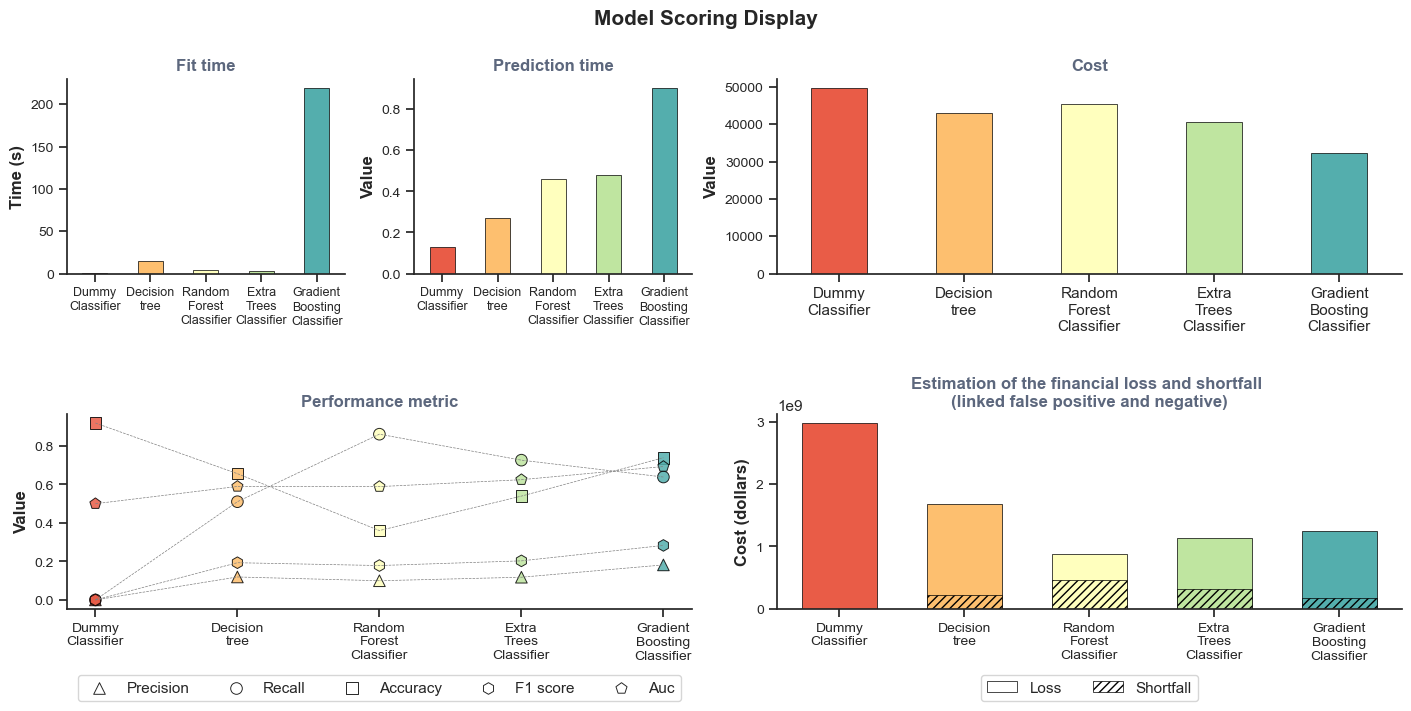

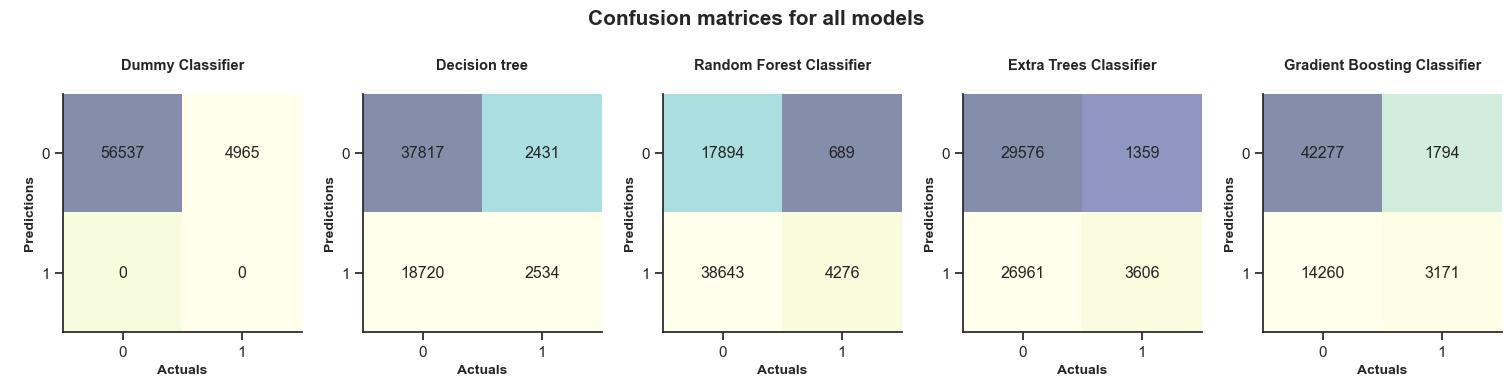

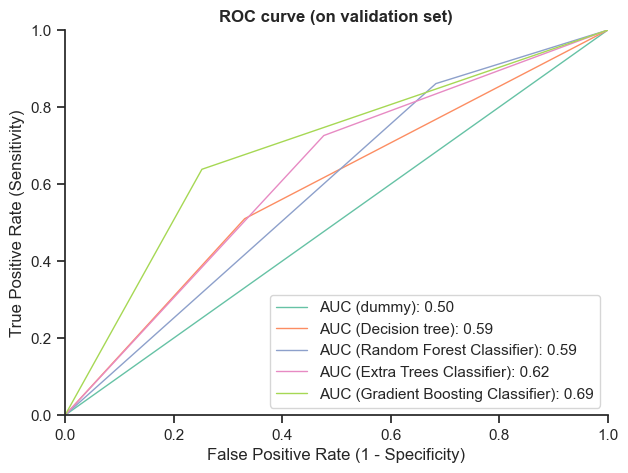

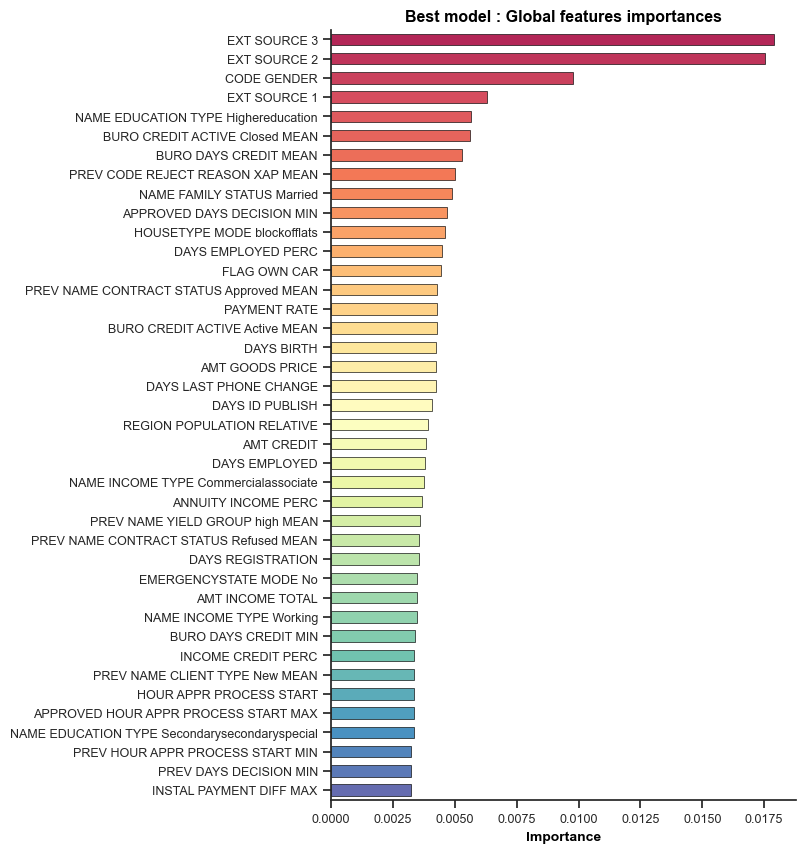

In [150]:
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# From the kernel creator (https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script)
# Most features are created by applying min, max, mean, sum and var functions to grouped tables. 
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
# You can use LightGBM with KFold or Stratified KFold.
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------------------------
# GENERIC FUNCTIONS 
# ------------------------------------------------------------------------------------------------------------------------------------------------
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Local dataframe used to store infos
def temporary_df():
    # Function to create empty but formatted dataframe
    info = pd.DataFrame(columns = ['model','fit time','prediction time','precision','recall','accuracy','f1 score','AUC',"Cost","Loss",'Shortfall'])
    roc = pd.DataFrame(columns = ['model','fpr','tpr','AUC'])
    conf = pd.DataFrame(columns = ['model','TN','FN','TP','FP'])
    return info, roc, conf

# Fast calcul of the pourcent of features composed of missing data
def PourcentNa(dataframe):
    Pourcent=dataframe.isna().sum()/len(dataframe)*100
    PourcentNadf = Pourcent.loc[Pourcent != 0]
    print("\nPourcent of features with missing data (NaN):", startbold,round(len(PourcentNadf)/len(dataframe.columns)*100,1),endbold,"%")

def dataframe_NaN_cleaning_step(dataframe, limit_percent_NaN):
    '''Dropping all columns with more than a threshold pourcent of missing data'''
    original_dimension = dataframe.shape
    min_count =  int(((100-limit_percent_NaN)/100) * dataframe.shape[0] + 1)
    dataframe.dropna(axis=1, thresh=min_count, inplace=True)
    print("Equivalent to",original_dimension[1]-dataframe.shape[1],"features in less")
    return dataframe.columns

# ------------------------------------------------------------------------------------------------------------------------------------------------
# DATA PREPARATION 
# ------------------------------------------------------------------------------------------------------------------------------------------------
# Preprocess application_train.csv and application_test.csv
def application_train_test(nan_as_category = False): 
    # Read data and merge
    df = pd.read_csv(path + 'application_train.csv')
    test_df = pd.read_csv(path + 'application_test.csv')
    df = df.append(test_df).reset_index() # Distinction between test and train via "TARGET" variable
    
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    # Categorical features with Binary encode (0 or 1; two categories) # STANDBY corr here cause sometime 0= yes (realty) others 0=No (car)
    first_cat_list = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
    for bin_feature in first_cat_list:
        df[bin_feature], _ = pd.factorize(df[bin_feature])
    
    # Categorical features with One-Hot encode
    df, categorial_columns  = one_hot_encoder(df, nan_as_category) # storage of categorial_columns for a better tracking
    joined_cat_list = [*categorial_columns, *first_cat_list]

    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'] # standby - remove 16 years at least ? 
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df, joined_cat_list

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(nan_as_category = True): 
    bureau = pd.read_csv(path + 'bureau.csv')
    bb = pd.read_csv(path + 'bureau_balance.csv')
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])

    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()

    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    cat_list = bb_cat.append(bureau_cat)
    return bureau_agg, cat_list

# Preprocess previous_applications.csv
def previous_applications(nan_as_category = True):
    prev = pd.read_csv(path + 'previous_application.csv')
    prev, cat_cols = one_hot_encoder(prev, nan_as_category)
    # Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg, cat_cols

# Preprocess POS_CASH_balance.csv
def pos_cash(nan_as_category = True):
    pos = pd.read_csv(path + 'POS_CASH_balance.csv')
    pos, cat_cols = one_hot_encoder(pos, nan_as_category)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg, cat_cols
    
# Preprocess installments_payments.csv
def installments_payments(nan_as_category = True):
    ins = pd.read_csv(path + 'installments_payments.csv')
    ins, cat_cols = one_hot_encoder(ins, nan_as_category)

    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)

    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg, cat_cols

# Preprocess credit_card_balance.csv
def credit_card_balance(nan_as_category = True):
    cc = pd.read_csv(path + 'credit_card_balance.csv')
    cc, cat_cols = one_hot_encoder(cc, nan_as_category)

    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])

    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg, cat_cols

# Final data preparation - for models comparaison
# Train and test split, remove of feature with more tha 60% of missing data, missing data implementation, correction of unbalanced classes
def final_data_preparation(df):
    # We will modify the dataframe (replacement of missing values), before for the Streamlit visualization,
    # we save the dataframe (without the TARGET):
    df.drop(['TARGET'],axis=1).to_csv(output_path + "original_dataframe.csv", index= False) 
    # ----------------------------------------------------------------------------------
    feats = [f for f in df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']] # remove all ID feature useless for modelisation step
    # ----------------------------------------------------------------------------------
    # Dropping all columns with more than 60% missing data : 
    del_col = dataframe_NaN_cleaning_step(df[feats], 60.0)
    feats = [f for f in feats if f in del_col] # Remove columns with more than 60% of missing data from feats
    # ----------------------------------------------------------------------------------
    # there is somme infinite value in the dataset, we will replace these values by missing value (NaN)
    for col in ["INSTAL_PAYMENT_PERC_MAX","PREV_APP_CREDIT_PERC_MAX"]:
        df[col] = df[col].replace([np.inf, -np.inf], np.nan) 

    # remplace missing data (NaN) 
    for col in feats:
        if df[col].isna().values.sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)
    # ----------------------------------------------------------------------------------
    # Split datasets between modelisation and post-production :
    # Note : this application test is not for the model test phase by for the model prediction phase
    application_train_df = df[df['TARGET'].notnull()]
    application_test_df = df[df['TARGET'].isnull()] 

    # Saving parameters in MLFLOW tracking
    mlflow.log_param("Modelisation dataset", application_train_df.shape)
    mlflow.log_param("Prediction dataset", application_test_df.shape)
    # ----------------------------------------------------------------------------------
    # Split datasets in two for training and testing stages
    train, test = train_test_split(application_train_df, test_size=0.2, random_state=random_state, stratify=application_train_df["TARGET"]) 
    mlflow.log_param("Modelisation training set", train.shape)
    mlflow.log_param("Modelisation test set", test.shape)

    test = test[feats + ["TARGET"]] # For the test phase, we will not need the other features - STANDBY

    # For modelisation train dataset : class re-sampling to corrected unbalanced category
    over = SMOTE(random_state=random_state,sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=.7)
    steps = [('o', over), ('u', under)] # First step of oversampling and Second step of undersampling
    pipeline = imblearn.pipeline.Pipeline(steps=steps)
    train, target = pipeline.fit_resample(train[feats], train["TARGET"])
    print('Resampled dataset shape %s' % Counter(target))

    # Rejoined train and target:
    train['TARGET'] = target.copy()
    mlflow.log_param("Modelisation training - set post resampling for unbalanced cat", train.shape)
    del df, target, pipeline
    gc.collect()
    return application_train_df, application_test_df, train, test, feats

# ------------------------------------------------------------------------------------------------------------------------------------------------
# SCORING
# ------------------------------------------------------------------------------------------------------------------------------------------------
# Scoring functions - We adapted the metric in order to reduce the amount of false negative
def cost_fn(y_true, y_prob, thres):
    fp = np.where((y_prob >= thres) & (y_true==0),1,0)
    fn = np.where((y_prob <= thres) & (y_true==1), 10, 0)
    return np.sum([fn,fp])

# Display/plot of cost FN (local scoring method)
def cost_FN_selection_display(thre_auc_):
    fig = plt.figure(constrained_layout=True,figsize=(10, 6))
    axd = fig.subplot_mosaic(
        """
        AAB
        """)
    g = sns.lineplot(data=thre_auc_, x=thre_auc_.columns.tolist()[0], y=thre_auc_.columns.tolist()[1],color="#ff6a9e",markers=True, lw=1,marker="o",ax=axd['A'])
    # axd["A"].set_ylabel(color='black',fontsize=10,fontweight="bold")
    ax2 = g.axes.twinx()
    sns.lineplot(data=thre_auc_, x=thre_auc_.columns.tolist()[0], y=thre_auc_.columns.tolist()[2], ax=ax2,color="#af2690",markers=True, lw=1,marker="o")
    g.legend(handles=[Line2D([], [], marker='_', color="#ff6a9e", label=thre_auc_.columns.tolist()[1]), Line2D([], [], marker='_', color="#af2690", label=thre_auc_.columns.tolist()[2])])
    axd["A"].set_xlabel("")
    axd["A"].axvline(thre_auc_["threshold"].iloc[np.argmin(thre_auc_["Cost FN"])], color = "red",linestyle="--",lw=1)
    axd["A"].set_ylabel("Cost FN",color='black',fontsize=10,fontweight="bold")
    ax2.set_ylabel("AUC",color='black',fontsize=10,fontweight="bold")

    ax = sns.barplot(data=thre_auc_, x=thre_auc_.columns.tolist()[0], y=thre_auc_.columns.tolist()[3], color="#8c77de",width=0.4, ax=axd['B'],edgecolor="black",linewidth=.5)
    for i in ax.containers:
        ax.bar_label(i,fmt='%.1f', padding=3,fontsize=9,fontweight="bold")
    ax.set(ylim=(0, max(thre_auc_[thre_auc_.columns.tolist()[3]])+max(thre_auc_[thre_auc_.columns.tolist()[3]])*10/100))
    axd["B"].set_xlabel("Threshold",color='black',fontsize=10,fontweight="bold")
    axd["B"].set_ylabel("Time (s)",color='black',fontsize=10,fontweight="bold")
    plt.show()

# Display/plot feature importance
def display_importances(feature_importance_df_): # STANDBY to corr
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    best_features["feature"] = best_features["feature"].str.replace("_"," ")
    plt.figure(figsize=(6, 10))
    g = sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False), edgecolor="black",linewidth=.5,\
                    palette=sns.color_palette("Spectral", 40), saturation=1, alpha = .9, width=0.6)
    g.set_xlabel('Importance', fontdict={'size': 10, 'weight': 'bold', 'color': 'black'})
    g.set_ylabel('')
    g.set_title('Best model : Global features importances',fontdict={'size': 11.5, 'weight': 'bold', 'color': 'black'})
    for tick in g.yaxis.get_major_ticks():
                    tick.label.set_fontsize(9)
    for tick in g.xaxis.get_major_ticks():
                    tick.label.set_fontsize(9)
    plt.savefig(output_path + 'global_feat_importance.png')
    
# Calcul of all 'classic' score (accuracy, precision, etc.)
def score_calcul(y_true,y_pred,mean_loan):
    prec = precision_score(y_true, y_pred) # precision = TP / (FP + TP)
    recall = recall_score(y_true, y_pred)  # recall = TP / (FN + TP)
    accuracy = accuracy_score(y_true, y_pred) # accuracy = (TP + TN)/ (TP + FN + TN + FP)
    f1 = f1_score(y_true, y_pred) # F1 Score =  harmonic mean of precision and recall score
    fpr, tpr, _ = roc_curve(y_true,  y_pred) # False Positif and False Negatif rates # A transformer un fonction ici ! - STANDBY
    auc = roc_auc_score(y_true, y_pred) # AUC
    conf = confusion_matrix(y_true, y_pred) # Confusion matrix 

    # False Positif and False Positif
    FN = conf[1,0]
    FP = conf[0,1]
    # Local scoring : Count of False Negatifs - STANDBY change name
    cout_met = 10*FN + FP
    # Loss and Shortfall (both calculated from mean loan)
    loss = FN * mean_loan
    shortfall = FP * mean_loan * 2/100 # hypothetical loan rate (2%)
    return prec, recall, accuracy, f1, auc, fpr, tpr, cout_met, loss, shortfall

# Display/plot 'classic' score (accuracy, precision, etc.)
def display_models_info(model_info): 
    fig = plt.figure(constrained_layout=True,figsize=(14, 7))
    axd = fig.subplot_mosaic(
                        """
                        ABDD
                        EEFF
                        """)
    fig.suptitle("Model Scoring Display\n", fontsize=15,fontweight="bold")
    model_info["Loss"] =  model_info["Loss"] + model_info["Shortfall"] # The two plot will be display one on top of the other
    model_info_melt = model_info.melt('model', var_name='parameters', value_name='value')
    model_info_melt["model"] = model_info_melt["model"].replace(' ', '\n', regex=True)
    feat = model_info_melt["parameters"].unique()
    plot_number = ['A','B','C','C','C','C','C','D','E','F']

    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params) # 

    for i in range(8):
        support = model_info_melt[model_info_melt["parameters"]==feat[i]].drop(["parameters"], axis=1)
        marker_list = ["^","o","s","h","p"]

        if 2 <= i < 7:
            j = i - 2
            axd['E'].plot(support['model'],support['value'], '--', color="grey", linewidth=.5)
            axd['E'].scatter(support['model'],support['value'], color=sns.color_palette("Spectral", len(model_info["model"])), s=70, alpha=0.85, \
                edgecolor ="black", marker=marker_list[j], linewidths = .7, label=feat[i].capitalize())
            for tick in axd['E'].xaxis.get_major_ticks():
                tick.label.set_fontsize(10)
            for tick in axd['E'].yaxis.get_major_ticks():
                tick.label.set_fontsize(10)
            axd['E'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), shadow=False, ncol=5);
            axd['E'].set_title('Performance metric',fontdict={'size': 12, 'weight': 'bold', 'color': '#5c677d'})
            axd['E'].set_ylabel('Value',fontweight="bold")
            
        else:
            g = sns.barplot(data=support, x="model", y="value", width=0.45, ax=axd[plot_number[i]],edgecolor="black",linewidth=.5,\
                    palette=sns.color_palette("Spectral", len(model_info["model"])), saturation=1)
            g.set_xlabel('')
            plot_title = feat[i].capitalize()
            g.set_title(plot_title,fontdict={'size': 12, 'weight': 'bold', 'color': '#5c677d'})
            for tick in axd[plot_number[i]].yaxis.get_major_ticks():
                tick.label.set_fontsize(10)

        if i<2:
            g.set_ylabel('Time (s)',fontweight="bold")
            for tick in axd[plot_number[i]].xaxis.get_major_ticks():
                tick.label.set_fontsize(9)
        else:
            g.set_ylabel('Value',fontweight="bold")

        # Legend correction 
    for ha in axd['E'].legend_.legendHandles:
            ha.set_color("white")
            ha.set_edgecolor("black")

        # Display Loss and Shortfall
    support = model_info_melt[model_info_melt["parameters"]==feat[8]].drop(["parameters"], axis=1)
    sns.barplot(x = 'model', y = 'value', data = support, width=0.6, edgecolor = 'black', ax=axd['F'], linewidth=.5,\
            palette=sns.color_palette("Spectral", len(model_info["model"])), saturation=1, label = feat[8]) # label = 'Total', color = 'b', edgecolor = 'w')
    support = model_info_melt[model_info_melt["parameters"]==feat[9]].drop(["parameters"], axis=1)
    sns.barplot(x = 'model', y = 'value', data = support, width=0.6, edgecolor = 'black', ax=axd['F'], linewidth=.5,\
            palette=sns.color_palette("Spectral", len(model_info["model"])), saturation=1, label = feat[9]) # ,label = 'Alcohol-involved', color = 'b', edgecolor = 'w')
    hatches = [ "", "////"]
        # Loop over the bars
    for bars, hatch in zip(axd['F'].containers, hatches):
            # Set a different hatch for each group of bars
        for bar in bars:
            bar.set_hatch(hatch)
    # sns.despine(left = True, bottom = True)
    axd['F'].legend(ncol = 1, loc = 'upper right',fancybox=True,facecolor = 'w')
    axd['F'].set_title("\n\nEstimation of the financial loss and shortfall \n(linked false positive and negative)",fontdict={'size': 12, 'weight': 'bold', 'color': '#5c677d'})
    axd['F'].legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), shadow=False, ncol=2)
    for tick in axd['F'].xaxis.get_major_ticks():
                tick.label.set_fontsize(10)
    for tick in axd['F'].yaxis.get_major_ticks():
                tick.label.set_fontsize(10)
    axd['F'].set_ylabel('\n\nCost (dollars)',fontweight="bold")
    axd['F'].set_xlabel('');

        # Legend correction 
    for ha in axd['F'].legend_.legendHandles:
            ha.set_color("white")
            ha.set_edgecolor("black")

    plt.savefig(output_path + 'Model_Scoring_Display.png')

# Display/plot confusion matrix (for all models)
def confusion_matrix_display(conf_matrix):
    fig = plt.figure(constrained_layout=True,figsize=(15, 3.75))
    axd = fig.subplot_mosaic(
                        """
                        ABCDE
                        """)
    fig.suptitle("Confusion matrices for all models\n", fontsize=15,fontweight="bold")

    list_model = conf_matrix["model"].unique().tolist()
    position = ["A","B","C","D","E"]

    for i in range(len(list_model)):
        support = conf_matrix[conf_matrix["model"]==list_model[i]]
        axd[position[i]].set_title(list_model[i]+"\n",fontsize=10.5,fontweight = 'bold')
        axd[position[i]].matshow(np.array([[support["TN"][i],support['FP'][i]],[support["FN"][i],support["TP"][i]]]), cmap=plt.cm.YlGnBu, alpha=0.5)
        axd[position[i]].text(x=0, y=0, s = support["TN"][i], va='center', ha='center', fontsize=11.5)
        axd[position[i]].text(x=1, y=1, s = support["TP"][i], va='center', ha='center', fontsize=11.5)
        axd[position[i]].text(x=0, y=1, s = support["FP"][i], va='center', ha='center', fontsize=11.5)
        axd[position[i]].text(x=1, y=0, s = support["FN"][i], va='center', ha='center', fontsize=11.5)
        axd[position[i]].set_ylabel('\nPredictions', fontsize=10,fontweight = 'bold')
        axd[position[i]].set_xlabel('Actuals', fontsize=10,fontweight = 'bold')
        axd[position[i]].xaxis.tick_bottom()
    plt.savefig(output_path + 'Models_confusion_matrices.png')
    
# Display/plot of ROC curves for all models
def display_roc(roc_curves):
    plt.subplots(figsize=(7,5))
    dummy = roc_curves.loc[roc_curves["model"]=="Dummy Classifier"]
    plt.plot(dummy["fpr"][0],dummy["tpr"][0], color=sns.color_palette("Set2", 8)[0], lw=1, label='AUC (dummy): %.2f' % dummy["AUC"][0])
    models = roc_curves.loc[roc_curves["model"]!="Dummy Classifier"]
    models = models.reset_index(drop=True)
    list_model = models['model'].unique()
    for i in range(len(list_model)):
        plt.plot(models["fpr"][i],models["tpr"][i], color=sns.color_palette("Set2", 8)[i+1], lw=1, label='AUC (' + list_model[i] + '): %.2f' % models["AUC"][i])
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC curve (on validation set)",fontsize=12,fontweight="bold")
    plt.legend(loc=4)
    plt.savefig(output_path + 'roc_curves.png')

# ------------------------------------------------------------------------------------------------------------------------------------------------
# MODELS OPTIMIZATION - MODE=="OPT"
# ------------------------------------------------------------------------------------------------------------------------------------------------
# Function allowing models optimization - the mode in the main function have to be switch to "OPT" and a model name should be given
def model_optimization(model_name,train,test,threshold):
    print("Optimization of",model_name)

    if model_name == "Decision tree":
        model = tree.DecisionTreeClassifier(random_state=random_state)
        params = {'criterion':['gini', 'entropy'],
                  'max_depth':[6,12,18,24,32]}
    
    elif model_name == "Random Forest Classifier":
        model = ensemble.RandomForestClassifier(random_state=random_state)
        params = {'n_estimators': [2, 10, 20], # , 400, 600, 1000, 2000
                  'bootstrap': [True], 
                  'max_depth': [50, 80, 100],
                  'min_samples_leaf': [2, 3],
                  'min_samples_split': [4, 5, 6]}
                  # 'min_samples_leaf': [1, 2, 4],

    elif model_name == "Extra Trees Classifier":
        model = ensemble.ExtraTreesClassifier(random_state=random_state)
        params = {'n_estimators': [10]} # [10, 50, 200]

    elif model_name == "Gradient Boosting Classifier":
        model = XGBClassifier(random_state=random_state,use_label_encoder=False, eval_metric='mlogloss')
        params = {'n_estimators': [500, 100, 200]}

    thre_auc = pd.DataFrame(columns = ['threshold','Cost FN','AUC','time'])

    for t in threshold:
        t0 = time.time()
        scorer_fn = make_scorer(cost_fn, greater_is_better = True, needs_proba=True, thres = t)
        search = GridSearchCV(model, params, scoring=scorer_fn, cv=cv_val) 
        result = search.fit(train.drop(["TARGET"],axis=1), train['TARGET'])
        OPT_tps_fit = time.time() - t0

        if model_name == "Decision tree":
            model = tree.DecisionTreeClassifier(**result.best_params_,random_state=random_state)
        elif model_name == "Random Forest Classifier":
            model =  ensemble.RandomForestClassifier(**result.best_params_,random_state=random_state)
        elif model_name == "Extra Trees Classifier":
            model = ensemble.ExtraTreesClassifier(**result.best_params_, random_state=random_state)
        elif model_name == "Gradient Boosting Classifier":
            model = XGBClassifier(**result.best_params_, random_state=random_state,use_label_encoder=False, eval_metric='mlogloss')

        model.fit(train.drop(["TARGET"],axis=1), train['TARGET'])
        yprob = model.predict_proba(test.drop(["TARGET"],axis=1))
        ypred = [1 if x >= t else 0 for x in yprob[:,1]]

        fpr, tpr, _ = roc_curve(test["TARGET"],  ypred)
        Best_params = result.best_params_
        OPT_Bilan = pd.DataFrame(columns = ['mean_score_grid',"std_score_grid","best_score_grid","fit_time","num_cv","roc_score_best"])
        OPT_Bilan = OPT_Bilan.append({'mean_score_grid':result.cv_results_["mean_test_score"].mean(),
                                    "std_score_grid":result.cv_results_["std_test_score"].mean(),
                                    "best_score_grid":result.best_score_,
                                    "fit_time":OPT_tps_fit,
                                    "num_cv":cv_val,
                                    "roc_score_best":roc_auc_score(test["TARGET"], ypred)}, ignore_index=True)
        display_review_optimization(model_name,OPT_Bilan,Best_params,fpr, tpr,t)

        thre_auc = thre_auc.append({'threshold':t,'Cost FN':cost_fn(test["TARGET"],yprob[:,1],t),\
            'AUC':OPT_Bilan["roc_score_best"][0],'time':time.time() - t0}, ignore_index=True)

        # Best threshold for models saving : 
        model_thre = thre_auc["threshold"][np.argmin(thre_auc["Cost FN"].rank() + thre_auc["AUC"].rank(ascending=False)*2)] # *2 to give a higher importance value of Cost FN
        with open(path_models_variables+model_name+'_threshold.pkl', 'wb') as f:
            pickle.dump(model_thre, f)

    cost_FN_selection_display(thre_auc)

    if model_name == "Decision tree":
       joblib.dump(model, path_models_variables+'DecisionTree.joblib')
    
    elif model_name == "Random Forest Classifier":
        joblib.dump(model, path_models_variables+'RandomForestClassifier.joblib')
    
    elif model_name == "Extra Trees Classifier":
        joblib.dump(model, path_models_variables+'ExtraTreesClassifier.joblib')

    elif model_name == "Gradient Boosting Classifier":
        joblib.dump(model, path_models_variables+'GradientBoostingClassifier.joblib')

# Graphical display of model optimization
def display_review_optimization(model_name,OPT_Bilan,Best_params,fpr, tpr,t):
    fig = plt.figure(constrained_layout=True,figsize=(12, 6))
    axd = fig.subplot_mosaic(
        """
        FAAEE
        BCDEE
        """)
    fig.suptitle("Review of optimization step for "+model_name+" (threshold of "+str(t)+")\n", fontsize=13,fontweight="bold")
    #------------------------------------------------------------------------------------
    Variable = "mean_score_grid"
    ax = sns.barplot(data=OPT_Bilan, y=Variable, color="cornflowerblue",width=0.35, ax=axd['A'],edgecolor="black",linewidth=.5,yerr=OPT_Bilan["std_score_grid"])
    ax.set_xticks([])
    ax.set_title("GridSearch mean Score \n(Cost FN) - All parameters",color='black',fontsize=9,fontweight="bold")
    for c in ax.containers:
        if type(c) == matplotlib.container.BarContainer:
            ax.bar_label(c,fmt='%.f', padding=3,fontsize=8,fontweight="bold")
    ax.set(ylim=(0, OPT_Bilan[Variable][0]+(OPT_Bilan[Variable][0]*30/100))) # CV val + 10%
    ax.set_ylabel("")
    #------------------------------------------------------------------------------------
    Variable = "best_score_grid"
    ax = sns.barplot(data=OPT_Bilan, y=Variable, color="hotpink",width=0.35, ax=axd['B'],edgecolor="black",linewidth=.5)
    ax.set_xticks([])
    ax.set_title("Best Score (Cost FN)",color='black',fontsize=9,fontweight="bold")
    for i in ax.containers:
                ax.bar_label(i,fmt='%.f', padding=3,fontsize=8,fontweight="bold",color='red')
    ax.set(ylim=(0, OPT_Bilan[Variable][0]+(OPT_Bilan[Variable][0]*20/100))) # CV val + 10%
    ax.set_ylabel("")

    ax2 = ax.axes.twinx()
    sns.barplot(data=OPT_Bilan, y="roc_score_best", ax=ax2,color="purple",alpha = .0)
    ax2.set(ylim=(0,1))
    ax2.axhline(OPT_Bilan["roc_score_best"][0], color = "purple",linestyle="--",lw=1)
    ax2.set_ylabel("AUC value",color="purple")
    ax2.tick_params(axis='y', colors='purple')   
    #------------------------------------------------------------------------------------
    Variable = "num_cv"
    ax = sns.barplot(data=OPT_Bilan, y=Variable, color="yellowgreen",width=0.35, ax=axd['C'],edgecolor="black",linewidth=.5)
    ax.set_xticks([])
    ax.set_title("Number of CV",color='black',fontsize=9,fontweight="bold")
    for i in ax.containers:
        ax.bar_label(i,fmt='%.f', padding=3,fontsize=8,fontweight="bold")
    ax.set(ylim=(0, OPT_Bilan[Variable][0]+(OPT_Bilan[Variable][0]*20/100))) # CV val + 10%
    ax.set_ylabel("")
    #------------------------------------------------------------------------------------
    Variable = "fit_time"
    ax = sns.barplot(data=OPT_Bilan, y=Variable, color="orangered",width=0.35, ax=axd['D'],edgecolor="black",linewidth=.5)
    ax.set_xticks([])
    ax.set_title("Optimization time (s)",color='black',fontsize=9,fontweight="bold")
    for i in ax.containers:
        ax.bar_label(i,fmt='%.1f', padding=3,fontsize=8,fontweight="bold")
    ax.set(ylim=(0, OPT_Bilan[Variable][0]+(OPT_Bilan[Variable][0]*20/100))) # CV val + 10%
    ax.set_ylabel("")
    #------------------------------------------------------------------------------------ 
    ax = sns.lineplot(data=pd.DataFrame({'fpr':fpr, 'tpr':tpr}), x="fpr", y="tpr",ax=axd['E'],color="black",lw=1.2)
    ax.axline((0, 0), (1, 1), color='grey',lw=1.2,linestyle="dotted")
    ax.set_ylabel('\nTrue Positive Rate (Sensitivity)')
    ax.set_xlabel('False Positive Rate (1 - Specificity)')
    ax.set_title("ROC curve for best parameters",color='black',fontsize=9,fontweight="bold")
    #------------------------------------------------------------------------------------ 
    axd["F"].text(0.5, 0.75, "Best hyperparameters :",fontsize=9,fontweight="bold",horizontalalignment='center',verticalalignment='center')
    axd["F"].text(0.5, 0.5, Best_params,fontsize=9,horizontalalignment='center',verticalalignment='center')
    axd["F"].set_axis_off()

    plt.savefig(output_path + 'REV_OPT_' + model_name + '_' + str(t)+'.png')

# ------------------------------------------------------------------------------------------------------------------------------------------------
# MODELS RUNS - MODE!="RUN"
# ------------------------------------------------------------------------------------------------------------------------------------------------
# Function who run a dummy classifier   
def DummyModel(xtrain, xtest,mean_loan):
    model_name = "Dummy Classifier"
    print("\nIn process : ",startbold,model_name,endbold)
    model = dummy.DummyClassifier(strategy="most_frequent", random_state=random_state)
    joblib.dump(model, path_models_variables+'DummyClass.joblib')

    t0 = time.time()
    model.fit(xtrain.drop("TARGET",axis=1),xtrain['TARGET'])
    tps_fit = time.time() - t0

    t0 = time.time()    
    ypred = model.predict(xtest.drop("TARGET",axis=1))
    tps_pred = time.time() - t0

    prec, recall, accuracy, f1, auc, fpr, tpr, cout_met, loss, shortfall = score_calcul(xtest['TARGET'],ypred,mean_loan)
    a, b, c = temporary_df()
    a = a.append({"model":model_name,"fit time":tps_fit,"prediction time":tps_pred,'precision':prec,'recall':recall,\
        'accuracy':accuracy,'f1 score':f1,'AUC':auc,"Cost":cout_met,"Loss":loss,'Shortfall':shortfall}, ignore_index=True)
    b = b.append({"model":model_name,"fpr":fpr,"tpr":tpr,"AUC":auc}, ignore_index=True)
    conf = confusion_matrix(y_true=xtest['TARGET'], y_pred=ypred)
    # Storage of confusion into a dataframe (more stable)
    c = c.append({'model':model_name,'TN':conf[0,0],'FN':conf[1,0],'TP':conf[1,1],'FP':conf[0,1]}, ignore_index=True)
    return a, b, c
    
# Function who run all the model availables and alrealdy optimized
def models_runs(model_name_list, train, xtest, mean_loan, threshold):
    a, b, c = temporary_df()
    for i in range(len(model_name_list)):
        print("\nIn process : ",startbold,model_name_list[i],endbold)

        if model_name_list[i] == "Decision tree":
            model = joblib.load(path_models_variables+'DecisionTree.joblib')
            # Load of best threshold (between 0.2 and 0.4) for each model :
            with open(path_models_variables+'Decision tree_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)
            print("Model threshold : ",model_threshold)

        elif model_name_list[i] == "Random Forest Classifier":
            model = joblib.load(path_models_variables+'RandomForestClassifier.joblib')
            # Load of best threshold (between 0.2 and 0.4) for each model :
            with open(path_models_variables+'Random Forest Classifier_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)
            print("Model threshold : ",model_threshold)
        
        elif model_name_list[i] == "Extra Trees Classifier":
            model = joblib.load(path_models_variables+'ExtraTreesClassifier.joblib')
            # Load of best threshold (between 0.2 and 0.4) for each model :
            with open(path_models_variables+'Extra Trees Classifier_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)
            print("Model threshold : ",model_threshold)

        elif model_name_list[i] == "Gradient Boosting Classifier":
            model = joblib.load(path_models_variables+'GradientBoostingClassifier.joblib')
            # Load of best threshold (between 0.2 and 0.4) for each model :
            with open(path_models_variables+'Gradient Boosting Classifier_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)
            print("Model threshold : ",model_threshold)

        t0 = time.time()
        model.fit(train.drop("TARGET",axis=1), train['TARGET'])
        tps_fit = time.time() - t0
        
        t0 = time.time()    
        yprob = model.predict_proba(xtest.drop(["TARGET"],axis=1))
        ypred = [1 if x >= model_threshold else 0 for x in yprob[:,1]]
        tps_pred = time.time() - t0

        prec, recall, accuracy, f1, auc, fpr, tpr, cout_met, loss, shortfall = score_calcul(xtest['TARGET'],ypred,mean_loan)
        a = a.append({"model":model_name_list[i],"fit time":tps_fit,"prediction time":tps_pred,'precision':prec,'recall':recall,\
            'accuracy':accuracy,'f1 score':f1,'AUC':auc,"Cost":cout_met,"Loss":loss,'Shortfall':shortfall}, ignore_index=True) # Standby
        b = b.append({"model":model_name_list[i],"fpr":fpr,"tpr":tpr,"AUC":auc}, ignore_index=True)
        conf = confusion_matrix(y_true=xtest['TARGET'], y_pred=ypred)
        c = c.append({'model':model_name_list[i],'TN':conf[0,0],'FN':conf[1,0],'TP':conf[1,1],'FP':conf[0,1]}, ignore_index=True)
    return a, b, c

# ------------------------------------------------------------------------------------------------------------------------------------------------
# Function which will selected the best models and will save it locally for the API deployment
# ------------------------------------------------------------------------------------------------------------------------------------------------
def BestModel(train, test, best, flat_list, application_test_df, feats, mean_loan):
    print('--'*20)
    if best == "Decision tree":
        model = joblib.load(path_models_variables+'DecisionTree.joblib')
        with open(path_models_variables+'Decision tree_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)

    elif best == "Random Forest Classifier":
        model = joblib.load(path_models_variables+'RandomForestClassifier.joblib')
        with open(path_models_variables+'Random Forest Classifier_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)

    elif best == "Extra Trees Classifier":
        model = joblib.load(path_models_variables+'ExtraTreesClassifier.joblib')
        with open(path_models_variables+'Extra Trees Classifier_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)

    elif best == "Gradient Boosting Classifier": # STANDBY error lié à xgboost
        model = joblib.load(path_models_variables+'ExtraTreesClassifier.joblib')  # STANDBY error lié à xgboost
        with open(path_models_variables+'Gradient Boosting Classifier_threshold.pkl', 'rb') as f:
                model_threshold = pickle.load(f)
    else:
        model = joblib.load(path_models_variables+'DummyClass.joblib')
    #-------------------------------------------------------------------------------------------
    print("BEST MODEL :",model)
    signature = infer_signature(train[feats], train['TARGET'])
    model.fit(train[feats], train['TARGET']) # Refit du meilleur model ! STANDBY utile ? 

    if best == "Gradient Boosting Classifier": # STANDBY error lié à xgboost
        mlflow.sklearn.save_model(model, 'mlflow_models', signature=signature, pyfunc_predict_fn='predict_proba') # STANDBY - à revoir
    else:
        mlflow.sklearn.save_model(model, 'mlflow_models', signature=signature, pyfunc_predict_fn='predict_proba')


    with open(path_models_variables+'bestmodel_threshold.pkl', 'wb') as f:
            pickle.dump(model_threshold, f)

    yprob = model.predict_proba(test.drop(["TARGET"],axis=1))
    ypred = [1 if x >= model_threshold else 0 for x in yprob[:,1]]
    prec, recall, accuracy, f1, auc, fpr, tpr, cout_met, loss, shortfall = score_calcul(test['TARGET'], ypred, mean_loan)
    mlflow.log_metric("Best Model - AUC", auc)
    mlflow.log_metric("Best Model - Cost FN", cout_met)
    mlflow.log_metric("Best Model - Loss", loss)
    mlflow.log_metric("Best Model - Shortfall", shortfall)
    mlflow.log_param("Best model - threshold", model_threshold)
    mlflow.log_param("Best model - params", model.get_params())
    #-------------------------------------------------------------------------------------------
    # STANDBY - to suppress
    # Prediction on the application_test_df (model post production dataset) :
    #yprob_final = model.predict_proba(application_test_df[feats])
    #ypred_final = [1 if x >= model_threshold else 0 for x in yprob_final[:,1]] # STANDBY to remove
    #-------------------------------------------------------------------------------------------
    cat_list = [x for x in train.columns if x in flat_list]
    position = train.columns.get_indexer(cat_list)
    del cat_list
    #-------------------------------------------------------------------------------------------
    # Display feature importance
    #-------------------------------------------------------------------------------------------
    # LOCAL
    test = test.reset_index(drop=True)
    names = train.drop(["TARGET"],axis=1).columns
    idx = randint(1, len(test.drop(["TARGET"],axis=1)))
    print("Local feature importance (top 10) :")
    explainer = lime_tabular.LimeTabularExplainer(np.array(train.drop(["TARGET"],axis=1))  ,mode = "classification",\
        feature_names = names,random_state=random_state, categorical_features=position.tolist(), kernel_width=3,\
            class_names = ["0: will repay","1: difficulty to repay"])
    
    with open(output_path + "LIME_explainer", 'wb') as f: 
        dill.dump(explainer, f)
    
    randint(1, len(test))
    print("Prediction : ", model.predict(test.drop(["TARGET"],axis=1))[idx].reshape(1,-1))
    print("Actual :     ", test["TARGET"][idx])

    explanation = explainer.explain_instance(np.array(test.drop(["TARGET"],axis=1))[idx], model.predict_proba, num_features=10) # TOP 10 most important features
    explanation.show_in_notebook(show_table=True)
    print(explanation.as_list())
    print("\nExplanation Local Prediction  : ", explanation.local_pred)
    #-------------------------------------------------------------------------------------------
    # GLOBAL
    print("Global fetaures importaance :")
    fold_importance_df = pd.DataFrame()
    feature_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.drop(["TARGET"],axis=1).columns
    fold_importance_df["importance"] = model.feature_importances_
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    with open(output_path + 'BestModel_FeatureImportance.pkl', 'wb') as f:
            pickle.dump(feature_importance_df, f)
    display_importances(feature_importance_df)
    #-------------------------------------------------------------------------------------------
    # return yprob_final[:,1] # STANDBY to suppress

# ------------------------------------------------------------------------------------------------------------------------------------------------
# MLKFLOW TRACKING 
# ------------------------------------------------------------------------------------------------------------------------------------------------
def mlflow_tracking_start(RUN_NAME):
    mlflow.set_tracking_uri('file:/Users/sandrineveloso/Documents/COURS_ENSEIGNEMENT_FORMATION/FORMATIONS/2103 OPENSCLASSROOM/7_PROJECT7/LIVRABLES/DataScientist_PRJ7/mlrun_store') 
    mlflow.set_experiment("mlfow tracking OCR projet7")
    # mlflow.set_experiment_tag() # STANDBY
    mlflow.start_run(run_name=RUN_NAME)
    run = mlflow.active_run()
    print("Active run_id: {}".format(run.info.run_id))

def mlflow_tracking_end(output_path):
    mlflow.log_artifact(output_path)

# ------------------------------------------------------------------------------------------------------------------------------------------------
def main(mode, model_name):
    complete_cat_list = []
    df, cat_col = application_train_test()
    complete_cat_list.append(cat_col)
    with timer("Process bureau and bureau_balance"):
        bureau, cat_col = bureau_and_balance()
        complete_cat_list.append(cat_col)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev, cat_col = previous_applications()
        complete_cat_list.append(cat_col)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos, cat_col = pos_cash()
        complete_cat_list.append(cat_col)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins, cat_col = installments_payments()
        complete_cat_list.append(cat_col)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc, cat_col = credit_card_balance()
        complete_cat_list.append(cat_col)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        del cc
        gc.collect()

    # Flatten all categorical list in one :
    flat_cat_list = []
    for i in range(len(complete_cat_list)):
        if complete_cat_list[i] is not None:
            for item in complete_cat_list[i]:
                flat_cat_list.append(item)
    with open(output_path + 'cat_feat_list.pkl', 'wb') as f:
            pickle.dump(flat_cat_list, f)

    with timer("Data final preparation"): 
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        del df["index"]
        PourcentNa(df)
        application_train_df, application_test_df, train, test, feats = final_data_preparation(df)

        application_test_df.to_csv(output_path + "application_test_df.csv", index= False)
        with open(path_models_variables+'feats.pkl', 'wb') as f:
            pickle.dump(feats, f)
        
        mean_loan = application_train_df["AMT_CREDIT"].mean() # Mean load asked calcul
        gc.collect()

    if mode == "OPT":
        print("---"*20)
        model_optimization(model_name, train, test, threshold)

    else:  
        with timer("Run Dummy Classifier"): 
            model_info, roc_curves, conf_matrix = DummyModel(train, test, mean_loan)
            gc.collect()
        
        with timer("Models Runs"):
            a, b, c = models_runs(model_name_list, train, test, mean_loan, threshold)
            model_info = model_info.append(a)
            model_info = model_info.reset_index(drop=True)
            roc_curves = roc_curves.append(b)
            conf_matrix = conf_matrix.append(c)
            conf_matrix = conf_matrix.reset_index(drop=True)
            gc.collect()

        with timer("Models visualisation"):
            display_models_info(model_info)
            confusion_matrix_display(conf_matrix)
            display_roc(roc_curves)

        with timer("Final model selection"):
            best_model = model_info.iloc[np.argmin(model_info["Cost"]),0]
            BestModel(train, test, best_model ,flat_cat_list, application_test_df, feats, mean_loan)
            # ypred_final = # STANDBY - to suppress
            # submission_kernel = pd.DataFrame(application_test_df['SK_ID_CURR']) # STANDBY to remove
            # ubmission_kernel["TARGET"] = ypred_final
            # submission_kernel.to_csv(output_path + "submission_kernel.csv", index= False)
            
    # MlFLOW tracking
    mlflow.log_param("random state", cv_val)  
    mlflow.log_param("CV n_folds", cv_val)    
    mlflow_tracking_end(output_path)

ITERATION = 10
RUN_NAME = f"run_{ITERATION} : ameliorations of confusion_matrix_display and display_models_info - Fev 18"

if __name__ == "__main__":
    random_state = 47
    startbold = "\033[1m" 
    endbold = "\033[0;0m"
    threshold = [.2,.3,.4]
    cv_val = 5
    # list of available models
    model_name_list = ["Decision tree","Random Forest Classifier","Extra Trees Classifier","Gradient Boosting Classifier"] 
    
    with timer("Full model run"):
        '''in RUN mode : it's mandatory to add an empty argument, here : "" 
        in OPT mode : precize the model (see the list : model_name_list) to optimized as a second argument'''
        mlflow_tracking_start(RUN_NAME)
        mode = 'RUN' # 'RUN' or 'OPT'
        mlflow.log_param("Mode", mode) 
        main(mode,"") # Attention in 'RUN' mode, it's mandatory to add an empty argument, here : "" 
    mlflow.end_run()

---

## MLFLOW info

In [ ]:
run = mlflow.get_run(run.info.run_id)
print("run_id: {}; status: {}; name: {}".format(run.info.run_id, run.info.status,run.info.run_name))
print("Active run: {}".format(mlflow.active_run()))

In [ ]:
experiment = mlflow.get_experiment("180150981241855562")
print("Name: {}".format(experiment.name))
print("Experiment_id: {}".format(experiment.experiment_id))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Tags: {}".format(experiment.tags))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))
print("Creation timestamp: {}".format(experiment.creation_time))

# To delete a run :
# mlflow.delete_run("d3dcec69f14745228083d9d3f8a1a6ee")
# To delete a experiement :
# mlflow.delete_experiment(experiment_id)

---

## Après installation de <span style="color:red">**mlflow ui**</span> (pip install mlflow ui)

Pour ouvrir l'interface web de mlflow ui :   
mflow ui --bacmlkend-store-uri='file:/.../mlrun_store'   
Les ... correspondent au chemin d'accès du fichier 'mlrun_store'
(p. ex. pour moi : /Users/sandrineveloso/Documents/COURS_ENSEIGNEMENT_FORMATION/FORMATIONS/2103 OPENSCLASSROOM/7_PROJECT7/LIVRABLES/DataScientist_PRJ7/mlrun_store)  

Rep terminal :   
[2023-01-14 19:24:14 +0100] [14764] [INFO] Starting gunicorn 20.1.0  
[2023-01-14 19:24:14 +0100] [14764] [INFO] Listening at: http://127.0.0.1:5000  
...  
Ouvrir http://127.0.0.1:5000 !   


---

## **Pour lancer l'<span style="color:red">**API**</span> (mlflow) dans le terminal :** 


mlflow models serve -m mlflow_models/ --env-manager=conda

* "mlflow_models_save/" :  local ou le model a été sauvegardé cf dans le script (dans la fonction BestModel) les lignes : "mlflow.sklearn.save_model ..." ou "mlflow.xgboost.save_model ..."

* "--env-manager=conda" : pour moi, sinon conflits avec pyenv ! Tu pourrais ne pas avoir besoin de cette précision

---

## Pour lancer **Streamlit**

Le fichier `dashboard.py` doit être affectez de l'adresse du serveur de l'API à la variable `MLFLOW_URI` dans la fonction `main`.

Après installation Streamlit : `pip install streamlit`

Lancer le terminal : `streamlit run dashboard.py`


---